# Thirst for Progress: A Data Story 

## Setting the stage

Crisis struck in 2003 when water availability was in decline. The public sector water program was failing. Funds and grants could be made available to the Tanzanian government to work towards solving what has become one of the largest humanitarian missions of the century, if only they would privatize water in the country. The panicked and exhausted government agreed, and the beginning of their relationship with City Water began. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import savefig
import pickle

pd.set_option('precision', 4)
pd.options.display.max_seq_items = None
pd.options.display.max_columns = 50
plt.style.use('ggplot')

In [4]:
df = pd.read_pickle('PKL/clean_df.pkl')

## Is there enough? 

Simply, no. In 2006, % of Tanzanians have access to clean drinking water, and it may still be kilometers a way. Women make arduous journies for daily water supplies, girls leave school or skip school altogether to make the journies for a second container of water. 

#### The data shows that while there is enough water in 21,648 functioning wells, but there there are 9,138 (almost half that number) that are non functional waterpoints with enough water to service their communities! 

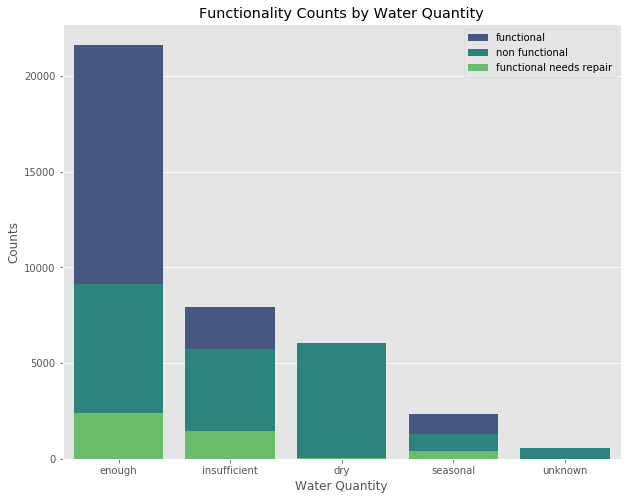

In [18]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(hue = 'status_group', x = 'quantity_group', dodge = False,
            data = df, hue_order=['functional', 'non functional', 'functional needs repair'], 
              palette = 'viridis')

plt.title('Functionality Counts by Water Quantity')
plt.xlabel('Water Quantity')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = [1, 1])
fig.patch.set_visible(False)
plt.show()


## Building waterpoints

The climb for new and functional waterpoints begins in purple around 2003, climbing quickly, but the repairs and non functional waterpoints grow as well. By 2005, the city is exhasparated with the mis-management and breach of contract from City Water. Instead of firing the company and phasing them out, the announcement is public cancelation of their contracts and ushered the executives out on a plane almost immediately(The Guardian).

#### In 2007, World Bank gave 1.42 billion dollars in funding (The Independent) and additional construction began. 

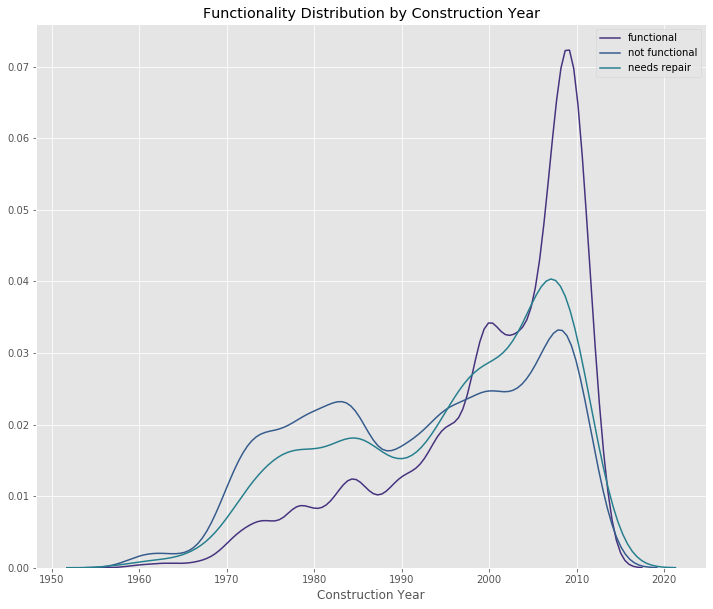

In [15]:
fig = plt.figure(figsize = (12, 10))
sns.set_palette('viridis')

tmp = df[df.construction_year!=0]
sns.distplot(tmp[tmp.status_group == 'functional'].construction_year, hist = False, 
            label='functional')
sns.distplot(tmp[tmp.status_group == 'non functional'].construction_year, hist = False, 
            label = 'not functional')
sns.distplot(tmp[tmp.status_group == 'functional needs repair'].construction_year, hist = False, 
            label = 'needs repair')

plt.legend(bbox_to_anchor = [1, 1])
plt.title('Functionality Distribution by Construction Year')
plt.xlabel('Construction Year')
fig.patch.set_visible(False)
plt.show()


In [47]:
cond = [df.construction_year > 2005, 
       df.construction_year > 2000, 
       df.construction_year > 1990, 
       df.construction_year > 1980, 
       df.construction_year > 1970]
vals = ['after05', '00s', '90s', '80s', '70s']

df['built_recent'] = np.select(cond, vals, 'others')


## So that's the end right? 

#### Unfortunately, it isn't quite that simple. According to Wikipedia, estimates from the Joint Monitoring Programme for Water Supply and Sanitation (JMP) show a different trend. They show a slight decline in access from 55% in 1990 to 53% in 2010. 

It's now 2020, and many non-profits are still active in Tanzania, but another problem seems to be the amount of waterpoints that fail within 10 years or less. Why? 

In [51]:
cond = [df.construction_year > 2010, 
       df.construction_year > 2005, 
       df.construction_year > 2000, 
       df.construction_year > 1995, 
       df.construction_year > 1990]
vals = ['2010+', '2005-2009', '2000-2004', '1995-1999', '1990-1994']

df['built_30'] = np.select(cond, vals, 'others')

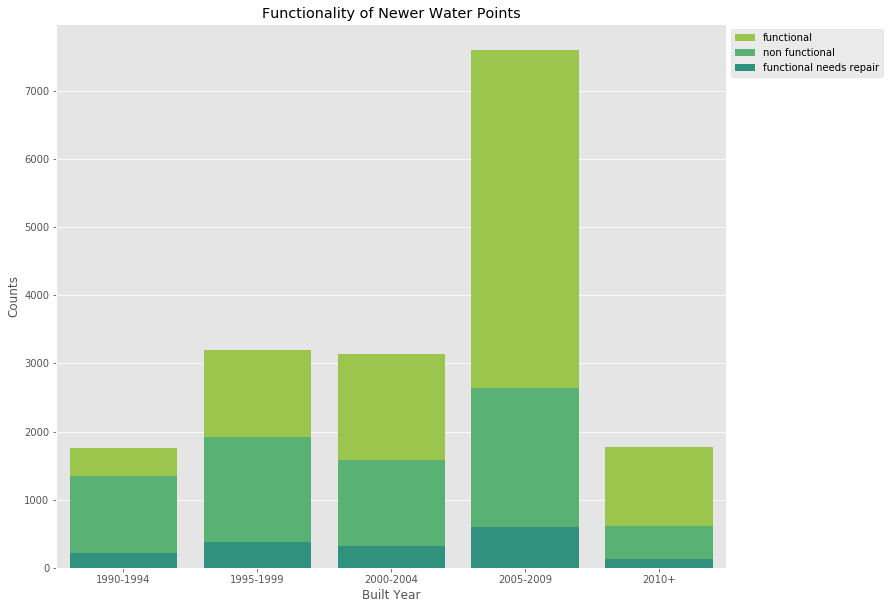

In [102]:
fig = plt.figure(figsize = (12, 10))
sns.set_palette('viridis_r')

sns.countplot(hue = 'status_group', x = 'built_30', dodge = False,
            data = df, order = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010+'])

plt.xticks(range(0, 5), ['1990-1994', '1995-1999','2000-2004', '2005-2009', '2010+'])

plt.title('Functionality of Newer Water Points')
plt.xlabel('Built Year')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = [1, 1])

fig.patch.set_visible(False)
plt.show()



## Extraction Type

#### In a study by World Bank, the number one cause of waterpoint failure is the water pump. 
58% of all waterpoint failures are due to the pump, and that percent steadily rises to 63% when the age of the waterpoint is between 5-10 years and again to 70% for those older than 11 years.



In [200]:
contingency_table = pd.crosstab(
    df.status_group,
    df.extraction_type_class,
    margins = True)
len(contingency_table.columns)

8

In [201]:
contingency_table.columns

Index(['gravity', 'handpump', 'motorpump', 'other', 'rope pump', 'submersible',
       'wind-powered', 'All'],
      dtype='object', name='extraction_type_class')

In [202]:
f_obs = np.array([contingency_table.iloc[0][0:19].values,
                  contingency_table.iloc[1][0:19].values,
                 contingency_table.iloc[2][0:19].values])
f_obs

array([[16048, 10375,  1135,  1029,   293,  3329,    50, 32259],
       [ 2701,   995,   138,   206,    17,   253,     7,  4317],
       [ 8031,  5086,  1714,  5195,   141,  2597,    60, 22824]])

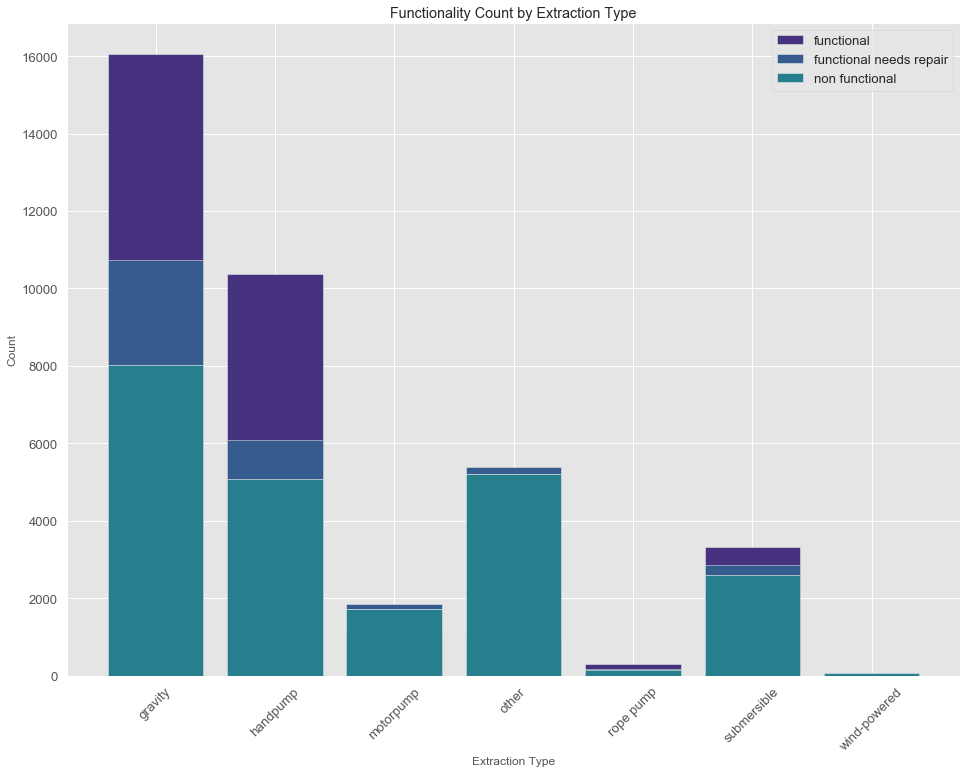

In [238]:
#Assigns the frequency values
functional = contingency_table.iloc[0][0:7].values
functional_needs_repair = contingency_table.iloc[1][0:7].values
non_functional = contingency_table.iloc[2][0:7].values

#Plots the bar chart
fig = plt.figure(figsize=(16,12))
sns.set(font_scale=1.2)
plt.style.use('ggplot')
sns.set_palette('viridis')

categories = ['gravity', 'handpump', 'motorpump', 'other', 'rope pump', 'submersible',
       'wind-powered']
    

p1 = plt.bar(categories, functional, 0.8)
p2 = plt.bar(categories, functional_needs_repair, 0.8, bottom = non_functional)
p3 = plt.bar(categories, non_functional, 0.8)
plt.xticks(rotation= 45)

plt.legend((p1[0], p2[0], p3[0]), ('functional','functional needs repair','non functional'))
plt.title('Functionality Count by Extraction Type')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
plt.show()

filename = 'extraction_type'
fig.savefig(filename)



## Amount TSH

#### The amount of "total static head" is a term describing the vertical distance that a pump raises water and it affects the waterpumps ability to pump water effectively. Those will lessr TSH seem to have more repair needs or less functionailiy. 


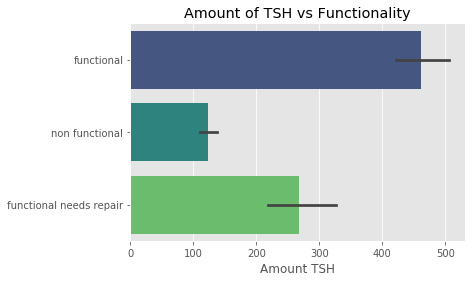

In [121]:
fig = plt.figure(figsize = (6, 4))
sns.barplot(x = 'amount_tsh', y = 'status_group', data = df, palette = 'viridis')

plt.title('Amount of TSH vs Functionality')
plt.xlabel('Amount TSH')
plt.ylabel('')
fig.patch.set_visible(False)
plt.show()



## Fixing the wells

#### Once waterpoints are constructed, many of them are monitored by a village counsil or a management company. 
Those establishments charge for the water, by bucket, annually, monthly, or free. Typical costs per container is around 2￠.  (The monthly average salary ~$45-50) 

If the "local" waterpoint is broken, many people turn to street vendors who sell water for around 10-15￠ a container. The broken waterpoints are then expected to be serviced out of those funds, some repairs can cost up to almost $100,000, and so they remain non functional, and the locals walk kilometers at a time to fill their 20 litres buckets only to turn around and carry it home.

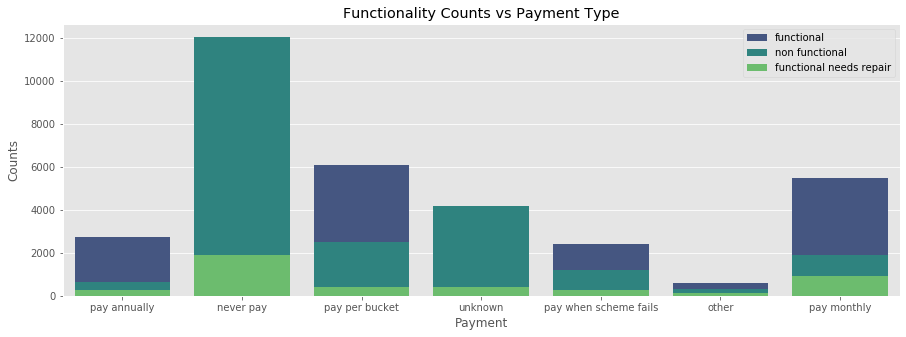

In [166]:
fig = plt.figure(figsize = (15, 5))

sns.countplot(hue = 'status_group', x = 'payment', dodge = False,
            data = df, hue_order=['functional', 'non functional', 'functional needs repair'], 
              palette = 'viridis')

plt.title('Functionality Counts vs Payment Type')
plt.xlabel('Payment')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = [1, 1])
fig.patch.set_visible(False)
plt.show()

#### This seems to hold up when looking at the data below. Villages with less than 10 waterpoints are likely to have large proportions of non functional sources compared to the ones that remain functional. 

In [10]:
# df.subvillage.nunique() # 19287 unique subvillages
sum(df.subvillage.value_counts() > 100) # most of them has less than 10 wells

23

In [11]:
subvil_counts = df.subvillage.value_counts()

In [12]:
# new column: n_wells_village
cond = [subvil_counts[df.subvillage] > 300, 
        subvil_counts[df.subvillage] > 100,
        subvil_counts[df.subvillage] > 50, subvil_counts[df.subvillage] > 10]
vals = ['more_than_300', 'more_than_100', 'more_than50', 'more_than_10']
df['n_wells_village'] = np.select(cond, vals, 'less_than_10')

In [13]:
# turn less than 100 wells village into 'others'
other_subvill =  [x for x in set(df.subvillage) if len(df[df.subvillage == x]) < 100]
df['subvillage'] = np.where(df.subvillage.isin(other_subvill), 'others', df.subvillage)

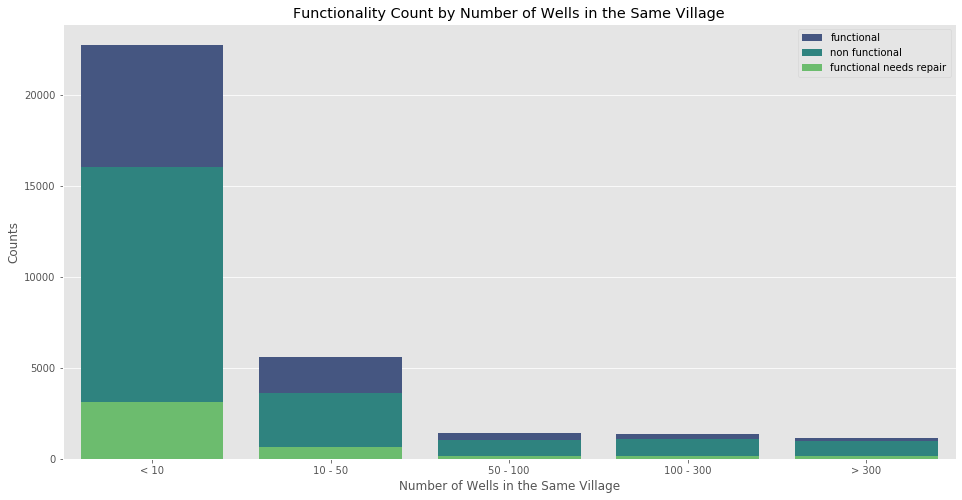

In [14]:
fig = plt.figure(figsize = (16, 8))

sns.countplot(hue = 'status_group', x = 'n_wells_village', dodge = False,
            data = df, order = ['less_than_10', 'more_than_10', 'more_than50', 'more_than_100', 'more_than_300'], 
              hue_order=['functional', 'non functional', 'functional needs repair'], palette = 'viridis')

plt.xticks(range(0, 5), ['< 10', '10 - 50', '50 - 100', '100 - 300', '> 300'])
plt.title('Functionality Count by Number of Wells in the Same Village')
plt.xlabel('Number of Wells in the Same Village')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = [1, 1])
fig.patch.set_visible(False)
plt.show()

filename = 'n_wells_village'
fig.savefig(filename)

#### While there is a lot to improve upon, we are hopeful that world leaders and non profits will continue their efforts in creating better sturdy water sources taking into account longevity of these features for the prople of Tanzania.

## Recommendations for future waterpoints: 

#### In analyzing this data, there are improvements that can me made that would likely have a positive impact on the issues surrounding water availability.  

	Failing pumps are costly and take critical resources away from the locals that depend on them. 
		- Further research into types and longevity of waterpumps that could replace the heavily failing motor and gravity pumps currently used would be a good start.

	The world bank study showed that village managed waterpoints are 20-40% more likely to fail between years 1 and 20. 
		- Education and technical training for local communities would will allow those in the 		communities to maintain waterpoints and better manage water pumps. 

	Payment is a large issues especially when the average monthly salary in Tanzania is $50. 
		- Financial support systems from local government areas or districs in addition to payment arrangements in place is crucial to driving a reliable water system. 


## Conclusion

By being able to predict which wells need repair, this would significantly cut down on resources being spent on waterpoint checks where they are less needed and concentrate the focus to the problem areas giving way to quicker improvements and by extension additional availability of this critical resource (Driven Data, Taarifa, Tanzania Ministry of Water).








With better managed and maintained water pumps, Tanzania may be able to begin growing it's economy and flourising as a country. 